## 자산 포트폴리오 분석 

### 분석 내용 
- 무작위 할당 
- 샤프 비율 계산
- 수익률, 위험률 계산 
- 개인 주식 종목과 포트폴리오에 대한 누적 수익률 

### 포트폴리오 란? 
- 여기서 말하는 포트폴리오는 간단히 말해 채권(고정소득증권)과 같은 금융 투자의 집합체 이다.
- 포트폴리오에서는 현금이나 현금성 자산의 뮤추얼 펀드, 상장 지수펀드가 포함될 수도 있다.
    - 뮤추얼 펀드 - 다수 개인 투자자에게서 자본을 끌어모아 주식이나 채권 등의 투자 자산을 매수 및 운용하는 상품
    - 상장 지수 펀드(ETF) - 특정 지수를 추종하는 인덱스 펀드를 거래소에 상장시켜 주식처럼 거래할 수 있도록 만든 펀드 
- 주요 쟁점은 고객의 자산으로 어디에 투자 할지 할당하는 것이다. 그래서 모든 것은 고객의 데이터를 들여다 봐야 분석이 가능하다. 

### 자산 유형 소개 

#### 주식 
- 주식은 회사의 특정 비율에 대한 소유권을 나타낸다. 주식은 단순히 소유주가 얼마나 많은 주식을 보유하고 있는지에 따라 주어진 회사의 일부 주식에 대한 권리를 소유자에게 부여한다. 
- 주식은 유동성 자산이다. 
- 주식은 한국을 기준으로 KRX(한국 거래소)에서 유가증권시장(Kospi), Kosdaq 등의 개설, 운영, 증권 매매를 관할 한다.

#### 고정 수익 증권(채권)
- 고정수익증권(채권)은 일반적으로 정부나 기업에서 발행하고 투자자가 차용인(빌려주는 사람)에게 헌 대출을 나타내는 고정 수입 증권 이다. 따라서 채권은 투자자에게 정해진 고정 이자율을 지불한다.
- 예를 들어 한국 국채는 연 3퍼센트를 지불하는데, 이 투자는 대체적으로 안전하기 떄문에 수익이 보장된다. 그래서 채권은 기본적으로 회사와 정부에서 자본을 조달하고 투자자에게 증서를 준다.
- 일반적으로 채권은 주식에 비해 덜 위험하다.(비교적 안전 자산에 속한다.)

#### 상장 지수 펀드(ETF)
- ETF는 유가 증권 그룹을 포함하며 한국을 기준으로 KODEX 200과 같은 추적 및 지수를 포한하는 증권 유형이다.
- ETF는 기본적으로 무퓨얼 펀드(주식 발행을 통해 투자자를 모집하여 형성된 투자자금을 전분 투자사가 운영햐도록 맡김)와 비슷하다. 하지만 ETF는 시장성이 있는 증권이기 때문에 다른 주식들과 유사하게 거래소에서 거래가 가능하다.
- ETF는 일반적으로 관리 수수료가 매우 낮고 리스크 분산을 위한 좋은 장치로도 쓰인다.

### 데이터 불러오기 및 데이터 비쥬얼라이제이션

In [1]:
# 라이브러리 및 모듈 불러오기 
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 데이터 불러오기 - 코스피 데이터 
kospi_df = pd.read_csv("data/kospi_stocks.csv")
kospi_df = kospi_df.sort_values(by=["Date"])
kospi_df = kospi_df.reset_index(drop=True)
kospi_df

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,2010.00,38750,114000,32800,70000,118000,20400,87700
1,2019-01-03,1993.70,37600,116500,32850,69600,122000,20500,87500
2,2019-01-04,2010.25,37450,119500,34850,70100,125500,20700,88200
3,2019-01-07,2037.10,38750,120500,34200,70900,131500,20600,88400
4,2019-01-08,2025.27,38100,119500,33800,68400,130000,19980,87100
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,2313.69,58100,157000,62700,42400,178000,53400,58900
981,2022-12-26,2317.14,57900,158000,63700,41900,178500,53600,59000
982,2022-12-27,2332.79,58100,158000,64100,44100,181000,54400,59400
983,2022-12-28,2280.45,56600,154000,60900,43200,180000,53600,61100


In [3]:
# 데이터 불러오기 - 코스닥 데이터 
kosdaq_df = pd.read_csv("data/kosdaq_stocks.csv")
kosdaq_df = kosdaq_df.sort_values(by=["Date"])
kosdaq_df = kosdaq_df.reset_index(drop=True)
kosdaq_df

,Date,KOSDAQ,ECHOPRO_BM,HANA_METERIALS,SM_ENTER,JYP_ENTER,PERARLABYSS,SEOUL_SMC
0,2019-03-06,746.70,16927,18300,46950,30000,166800,24550
1,2019-03-07,736.83,17247,18550,44900,29350,169300,22150
2,2019-03-08,735.97,17223,18150,45300,30100,170300,22050
3,2019-03-11,739.09,17050,18250,40550,31200,182300,21750
4,2019-03-12,754.76,16557,19000,39050,29950,184100,22250
...,...,...,...,...,...,...,...,...
939,2022-12-23,691.25,97000,33100,77100,66900,41900,10900
940,2022-12-26,694.68,97300,34800,79100,67300,43400,11050
941,2022-12-27,704.19,97900,34850,79300,68200,44400,11100
942,2022-12-28,692.37,92200,33350,76000,66900,43000,10500


#### 시각화  - 일반 데이터 & 정규화 데이터 

In [4]:
# 시각화 함수화 
def show_plot(df, fig_title):     # 데이터프렝림과 타이을을 받고 
    df.plot(x="Date", figsize=(15, 7), linewidth=3, title=fig_title) 
    plt.grid()
    plt.show()

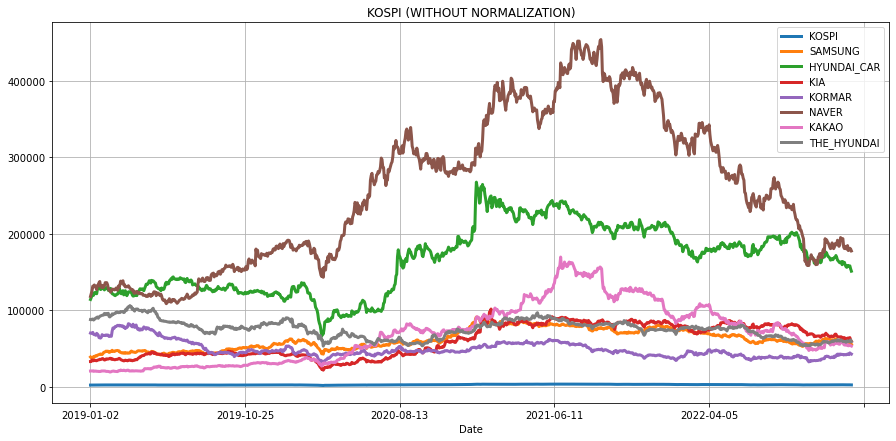

In [5]:
# 코스피 데이터 - 정규화 X
show_plot(df=kospi_df, fig_title="KOSPI (WITHOUT NORMALIZATION)")

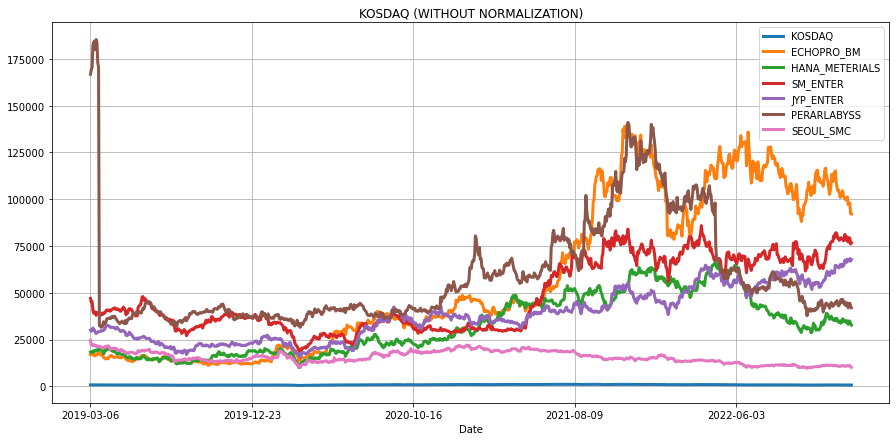

In [6]:
# 코스닥 데이터 - 정규화 X
show_plot(df=kosdaq_df, fig_title="KOSDAQ (WITHOUT NORMALIZATION)")

In [7]:
# 정규화 함수 설정
def normalize(df):
    x = df.copy()             # 데이터프레임 복사 
    for i in x.columns[1:]:   # 첫 번째 컬럼을 제외한 나머지 컬럼 기준 데이터프레임을 기준으로 반복문 작성
        x[i] = x[i]/x[i][0]   # 정규화 계산 - 전체값 / 초기값
    return x

In [8]:
# 코스피 지수 - 정규화 
normalize(kospi_df)

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,0.991891,0.970323,1.021930,1.001524,0.994286,1.033898,1.004902,0.997719
2,2019-01-04,1.000124,0.966452,1.048246,1.062500,1.001429,1.063559,1.014706,1.005701
3,2019-01-07,1.013483,1.000000,1.057018,1.042683,1.012857,1.114407,1.009804,1.007982
4,2019-01-08,1.007597,0.983226,1.048246,1.030488,0.977143,1.101695,0.979412,0.993158
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,1.151090,1.499355,1.377193,1.911585,0.605714,1.508475,2.617647,0.671608
981,2022-12-26,1.152806,1.494194,1.385965,1.942073,0.598571,1.512712,2.627451,0.672748
982,2022-12-27,1.160592,1.499355,1.385965,1.954268,0.630000,1.533898,2.666667,0.677309
983,2022-12-28,1.134552,1.460645,1.350877,1.856707,0.617143,1.525424,2.627451,0.696693


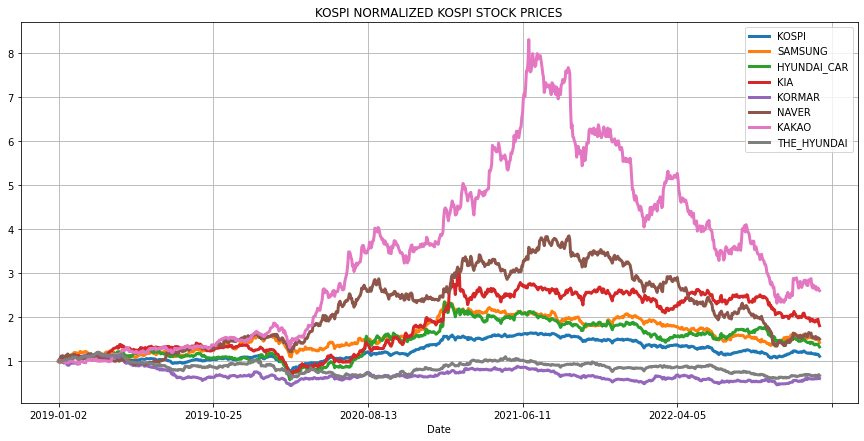

In [13]:
# 그래프 그려보기 
show_plot(df=normalize(kospi_df), fig_title="KOSPI NORMALIZED KOSPI STOCK PRICES")

In [10]:
# 코스닥 지수 - 정규화 
normalize(kosdaq_df)

,Date,KOSDAQ,ECHOPRO_BM,HANA_METERIALS,SM_ENTER,JYP_ENTER,PERARLABYSS,SEOUL_SMC
0,2019-03-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-03-07,0.986782,1.018905,1.013661,0.956337,0.978333,1.014988,0.902240
2,2019-03-08,0.985630,1.017487,0.991803,0.964856,1.003333,1.020983,0.898167
3,2019-03-11,0.989808,1.007266,0.997268,0.863685,1.040000,1.092926,0.885947
4,2019-03-12,1.010794,0.978141,1.038251,0.831736,0.998333,1.103717,0.906314
...,...,...,...,...,...,...,...,...
939,2022-12-23,0.925740,5.730490,1.808743,1.642173,2.230000,0.251199,0.443992
940,2022-12-26,0.930333,5.748213,1.901639,1.684771,2.243333,0.260192,0.450102
941,2022-12-27,0.943070,5.783659,1.904372,1.689031,2.273333,0.266187,0.452138
942,2022-12-28,0.927240,5.446919,1.822404,1.618743,2.230000,0.257794,0.427699


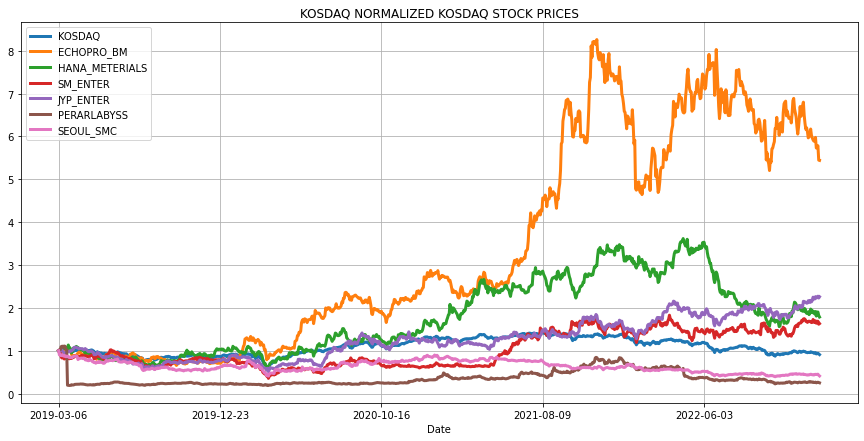

In [12]:
# 그래프 그려보기 
show_plot(df=normalize(kosdaq_df), fig_title="KOSDAQ NORMALIZED KOSDAQ STOCK PRICES")

### 자산 할당 
- 자산 할당이란 투자위험감수 즉 목표 수익율과 투자 기간을 기준으로 고객의 자산을 할당하는데 사용되는 투자 전략이다.
- 포트폴리오 매니저의 목표는 많은 수익과 리스크를 줄이는 것이다.
- 어떻게 자산을 할당할 수 있을까? 여러가지 방법이 있지만 대표적으로 아래의 방법으로 많이 분류한다.
    - 주식
    - 채권
    - 현금 등가물
    - ETF
    - 부동산
    - REIT(부동산 투자 신탁)

- 그럼 자산 할당은 어떻게 계산할까? 
- 예를들어 만약 우리가 1억원으로 투자할 수 있다고 가정해보자 
    1. 위의 열거한 모든 주요 주식에 대한 무작위로 비중을 지정한다. 
    2. 가지고 있는 1억원으로 코스피 기준 8개의 주식들에 대해 1억원을 나눈다. (이것들이 우리가 할당하려는 비중이 될 것이다.)
    3. 그럼 WEIGHTS 즉 가중치가 구성될 것이다.(해당 비중들을 무작위로 생성하기 위해 Numpy를 사용함.)

#### 여기서 잠깐, 만약 금융 설계사가 자산 할당, 특히 주식과 관련하여 현재 현역에서 일을하고 있는 청년들과 은퇴하신 몇몇 어르신들께 일반적으로 할 수 있는 조언은 무엇일까?
- 일반적으로 주식에 할당될 포트폴리오의 비율을 계산하기 위해 100에서 고객의 나이를 뺀다.
- 청년들에게 조언 
    - 만약 고객이 30살이라고 가정해보자. 먼저 100에서 30을 뺀다. 그럼 주식에 70%을 할당하게 된다. 
    - 여기서 중요한 점은 30살인 당신은 아직 시간이 많이 남아있기에 복리를 활용할 수 있고, 위험을 더 감수할 수 있다. 그래서 리스크가 있는 포트폴리오를 추천해줄 수 있다. 
- 은퇴한 어르신들에게 조언
    - 만약 고객이 70세라고 가정해보자. 먼저 100에서 70을 뺀다. 그럼 주식에 25%를 할당하게 된다. 은퇴한 모든 연장자들은 일반적으로 더 안정적이고 위험이 낮은 포트폴리오를 추천해줄 수 있다.

#### 자산할당 및 포트폴리오 일일 수익률 계산

In [14]:
# KOSPI

# step 1 무작위 비중 만들기 
# np.random.seed(101)
np.random.seed()

# step 2 만든 무작위 비중 계산(비중 생성)
my_weight = np.array(np.random.random(8))   # 8개의 난수를 행성

# step 3 모든 비중의 합이 1이 되도록 하기 - 지정한 난수들 / 난수들의 합
my_weight = my_weight / np.sum(my_weight)
print(my_weight)

[0.19264821 0.04323772 0.18642091 0.07417318 0.21110274 0.05145704
 0.15590336 0.08505685]


- 코스피 지수를 포함안 주가 종목의 개수가 8개이므로 8개의 난수를 생성한다. 
- 그리고 모든 비중의 합이 1이 되도록 계산해준다. 
    - 생성한 난수 / 난수들의 합 

In [18]:
# step 4 정규화 시키기
kospi_portfolio = normalize(kospi_df)
kospi_portfolio

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,0.991891,0.970323,1.021930,1.001524,0.994286,1.033898,1.004902,0.997719
2,2019-01-04,1.000124,0.966452,1.048246,1.062500,1.001429,1.063559,1.014706,1.005701
3,2019-01-07,1.013483,1.000000,1.057018,1.042683,1.012857,1.114407,1.009804,1.007982
4,2019-01-08,1.007597,0.983226,1.048246,1.030488,0.977143,1.101695,0.979412,0.993158
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,1.151090,1.499355,1.377193,1.911585,0.605714,1.508475,2.617647,0.671608
981,2022-12-26,1.152806,1.494194,1.385965,1.942073,0.598571,1.512712,2.627451,0.672748
982,2022-12-27,1.160592,1.499355,1.385965,1.954268,0.630000,1.533898,2.666667,0.677309
983,2022-12-28,1.134552,1.460645,1.350877,1.856707,0.617143,1.525424,2.627451,0.696693


In [19]:
# step 5 모든 열의 이름들의 목록 얻어내기 
kospi_portfolio.columns[1:]

Index(['KOSPI', 'SAMSUNG', 'HYUNDAI_CAR', 'KIA', 'KORMAR', 'NAVER', 'KAKAO',
       'THE_HYUNDAI'],
      dtype='object')

- 모든 종목들을 정규화 시켜준다. 
- 그리고 모든 열(종목) 목록을 만들어 준다.

In [20]:
# step 6 테이블 만들기 - enumerate함수 활용
for counter, stock in enumerate(kospi_portfolio.columns[1:]):
    # 보유한 주식의 값(정규화된) * 가중치 
    kospi_portfolio[stock] = kospi_portfolio[stock] * my_weight[counter]
    # 위에 계산한 가중치 * 1억원 
    kospi_portfolio[stock] = kospi_portfolio[stock] * 100000000

# 초기 할당 테이블 결과 확인
kospi_portfolio

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,1.926482e+07,4.323772e+06,1.864209e+07,7.417318e+06,2.111027e+07,5.145704e+06,1.559034e+07,8.505685e+06
1,2019-01-03,1.910859e+07,4.195454e+06,1.905091e+07,7.428624e+06,2.098964e+07,5.320134e+06,1.566676e+07,8.486287e+06
2,2019-01-04,1.926722e+07,4.178717e+06,1.954149e+07,7.880900e+06,2.114043e+07,5.472761e+06,1.581961e+07,8.554178e+06
3,2019-01-07,1.952456e+07,4.323772e+06,1.970502e+07,7.733910e+06,2.138169e+07,5.734407e+06,1.574318e+07,8.573575e+06
4,2019-01-08,1.941118e+07,4.251244e+06,1.954149e+07,7.643455e+06,2.062775e+07,5.668996e+06,1.526936e+07,8.447493e+06
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,2.217553e+07,6.482869e+06,2.567376e+07,1.417884e+07,1.278679e+07,7.762163e+06,4.081000e+07,5.712484e+06
981,2022-12-26,2.220860e+07,6.460552e+06,2.583728e+07,1.440497e+07,1.263601e+07,7.783967e+06,4.096284e+07,5.722182e+06
982,2022-12-27,2.235860e+07,6.482869e+06,2.583728e+07,1.449543e+07,1.329947e+07,7.892986e+06,4.157423e+07,5.760977e+06
983,2022-12-28,2.185695e+07,6.315497e+06,2.518318e+07,1.377179e+07,1.302805e+07,7.849379e+06,4.096284e+07,5.925853e+06


In [21]:
# step 7 추가열 만들기 - step 6에서 계산한 모든 원화 값의 총합
kospi_portfolio["portfolio daily worth in ￦"] = df_portfolio[df_portfolio!="Date"].sum(axis=1)    # x축은 1과 같음(한마디로 더하는 기준을 가로열 지정)
kospi_portfolio

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI,portfolio daily worth in ￦
0,2019-01-02,1.926482e+07,4.323772e+06,1.864209e+07,7.417318e+06,2.111027e+07,5.145704e+06,1.559034e+07,8.505685e+06,8.000000
1,2019-01-03,1.910859e+07,4.195454e+06,1.905091e+07,7.428624e+06,2.098964e+07,5.320134e+06,1.566676e+07,8.486287e+06,8.016473
2,2019-01-04,1.926722e+07,4.178717e+06,1.954149e+07,7.880900e+06,2.114043e+07,5.472761e+06,1.581961e+07,8.554178e+06,8.162717
3,2019-01-07,1.952456e+07,4.323772e+06,1.970502e+07,7.733910e+06,2.138169e+07,5.734407e+06,1.574318e+07,8.573575e+06,8.258233
4,2019-01-08,1.941118e+07,4.251244e+06,1.954149e+07,7.643455e+06,2.062775e+07,5.668996e+06,1.526936e+07,8.447493e+06,8.120964
...,...,...,...,...,...,...,...,...,...,...
980,2022-12-23,2.217553e+07,6.482869e+06,2.567376e+07,1.417884e+07,1.278679e+07,7.762163e+06,4.081000e+07,5.712484e+06,11.342666
981,2022-12-26,2.220860e+07,6.460552e+06,2.583728e+07,1.440497e+07,1.263601e+07,7.783967e+06,4.096284e+07,5.722182e+06,11.386520
982,2022-12-27,2.235860e+07,6.482869e+06,2.583728e+07,1.449543e+07,1.329947e+07,7.892986e+06,4.157423e+07,5.760977e+06,11.508054
983,2022-12-28,2.185695e+07,6.315497e+06,2.518318e+07,1.377179e+07,1.302805e+07,7.849379e+06,4.096284e+07,5.925853e+06,11.269493


In [23]:
# step 8 포트폴리오 일일 수익율 계산 컬럼 추가 

# 최초값 0 설정
kospi_portfolio["portfolio daily % return"] = 0.0000

# 일일 수익율 계산
for i in range(1, len(kospi_df)):
    # ((오늘 수익 - 어제자 수익) / 어제자 수익) * 100
    kospi_portfolio["portfolio daily % return"][i] = ((kospi_portfolio["portfolio daily worth in ￦"][i] - kospi_portfolio["portfolio daily worth in ￦"][i-1]) / kospi_portfolio["portfolio daily worth in ￦"][i-1]) * 100
    
kospi_portfolio

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI,portfolio daily worth in ￦,portfolio daily % return
0,2019-01-02,1.926482e+07,4.323772e+06,1.864209e+07,7.417318e+06,2.111027e+07,5.145704e+06,1.559034e+07,8.505685e+06,8.000000,0.000000
1,2019-01-03,1.910859e+07,4.195454e+06,1.905091e+07,7.428624e+06,2.098964e+07,5.320134e+06,1.566676e+07,8.486287e+06,8.016473,0.205910
2,2019-01-04,1.926722e+07,4.178717e+06,1.954149e+07,7.880900e+06,2.114043e+07,5.472761e+06,1.581961e+07,8.554178e+06,8.162717,1.824291
3,2019-01-07,1.952456e+07,4.323772e+06,1.970502e+07,7.733910e+06,2.138169e+07,5.734407e+06,1.574318e+07,8.573575e+06,8.258233,1.170150
4,2019-01-08,1.941118e+07,4.251244e+06,1.954149e+07,7.643455e+06,2.062775e+07,5.668996e+06,1.526936e+07,8.447493e+06,8.120964,-1.662201
...,...,...,...,...,...,...,...,...,...,...,...
980,2022-12-23,2.217553e+07,6.482869e+06,2.567376e+07,1.417884e+07,1.278679e+07,7.762163e+06,4.081000e+07,5.712484e+06,11.342666,-2.072181
981,2022-12-26,2.220860e+07,6.460552e+06,2.583728e+07,1.440497e+07,1.263601e+07,7.783967e+06,4.096284e+07,5.722182e+06,11.386520,0.386624
982,2022-12-27,2.235860e+07,6.482869e+06,2.583728e+07,1.449543e+07,1.329947e+07,7.892986e+06,4.157423e+07,5.760977e+06,11.508054,1.067351
983,2022-12-28,2.185695e+07,6.315497e+06,2.518318e+07,1.377179e+07,1.302805e+07,7.849379e+06,4.096284e+07,5.925853e+06,11.269493,-2.072994
